<a href="https://colab.research.google.com/github/herihh19/reconhecimento_gatos_cachorros/blob/main/T2_Herica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconhecimento de Imagens de Gatos e Cachorros
Utilizei: TensorFlow e Keras

In [ ]:
#Carregamento do dataset:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:
!unzip cats_and_dogs_filtered.zip

In [3]:
!rm -rf cats_and_dogs_filtered.zip

In [ ]:
!pip install tensorflow

In [5]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
#Verificar quantas imagens para treinamento possui o dataset:
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('Train Cats: %s' % dataset_train_cats_len)
print('Train Dogs: %s' % dataset_train_dogs_len)
print('Validation Cats: %s' % dataset_validation_cats_len)
print('Validation Dogs: %s' % dataset_validation_dogs_len)

Train Cats: 1000
Train Dogs: 1000
Validation Cats: 500
Validation Dogs: 500


In [7]:
#Configuração do tamanho das imagens:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32 #quantidade de features que vou trazer por vez do dataset
epochs = 20 #número de vezes que vou passar no dataset inteiro
learning_rate = 0.0001 #taxa de aprendizagem

class_names = ['cat', 'dog']

In [10]:
#Carregamento dos datasets:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.


In [11]:
#carrega um conjunto de dados a partir de um diretório,
#formatando-o como um tf.data.Dataset que pode ser usado diretamente no treinamento.
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


In [12]:
#Divide o (dataset_validation) em dois:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 26
Test Dataset Cardinality: 6


In [13]:
1000 / 32

31.25

In [14]:
#Função para mostrar 9 imagens:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

<Figure size 640x480 with 0 Axes>

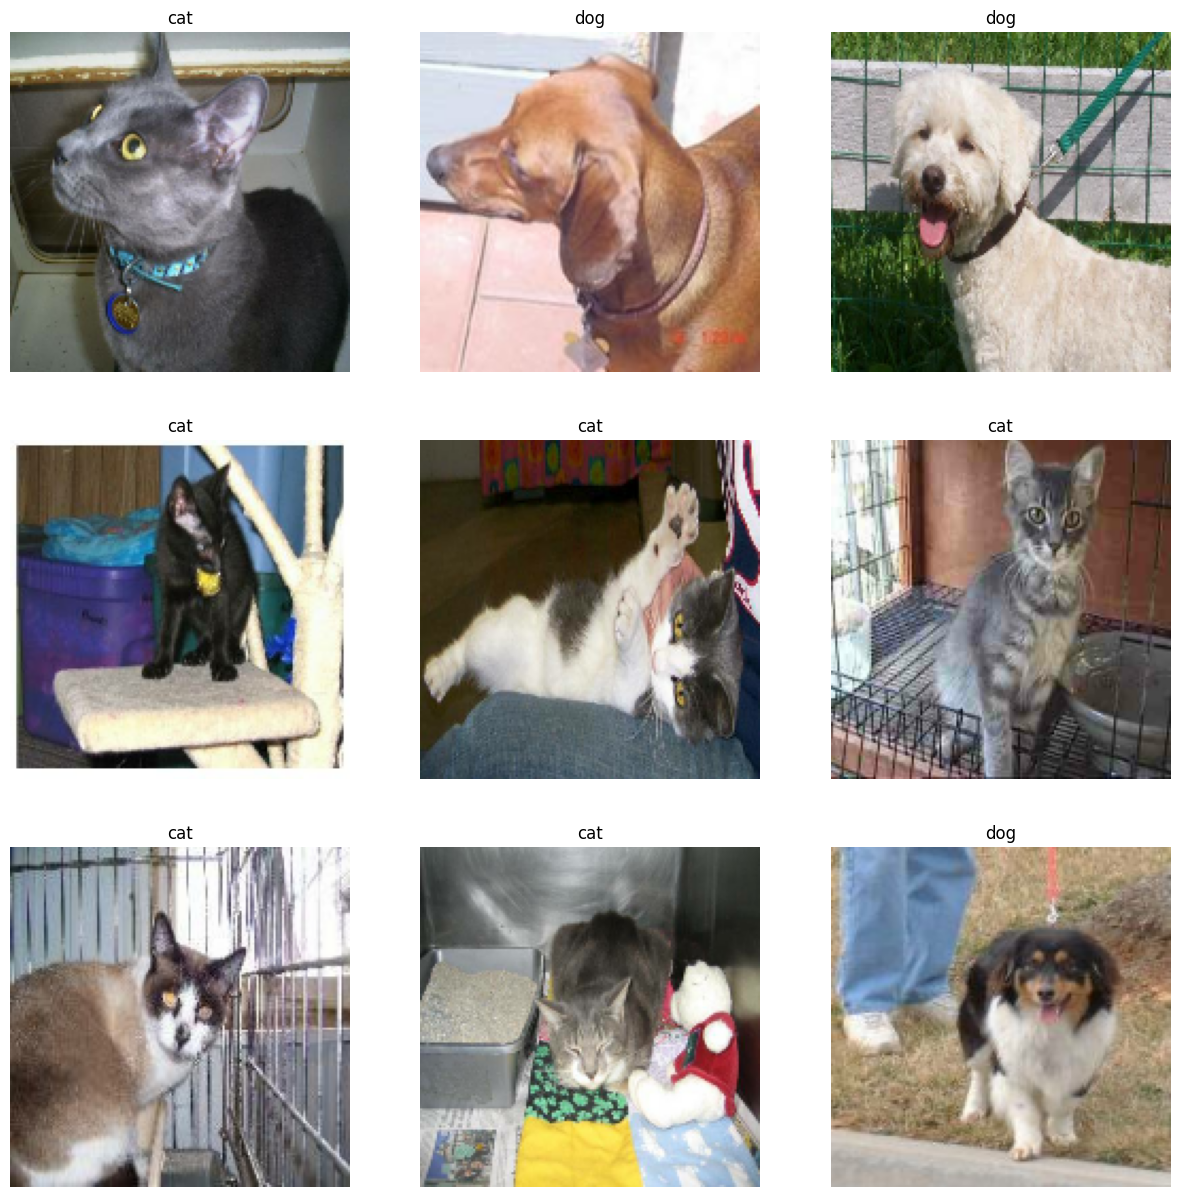

In [15]:
#Exibição dos dados
plot_dataset(dataset_train)


<Figure size 640x480 with 0 Axes>

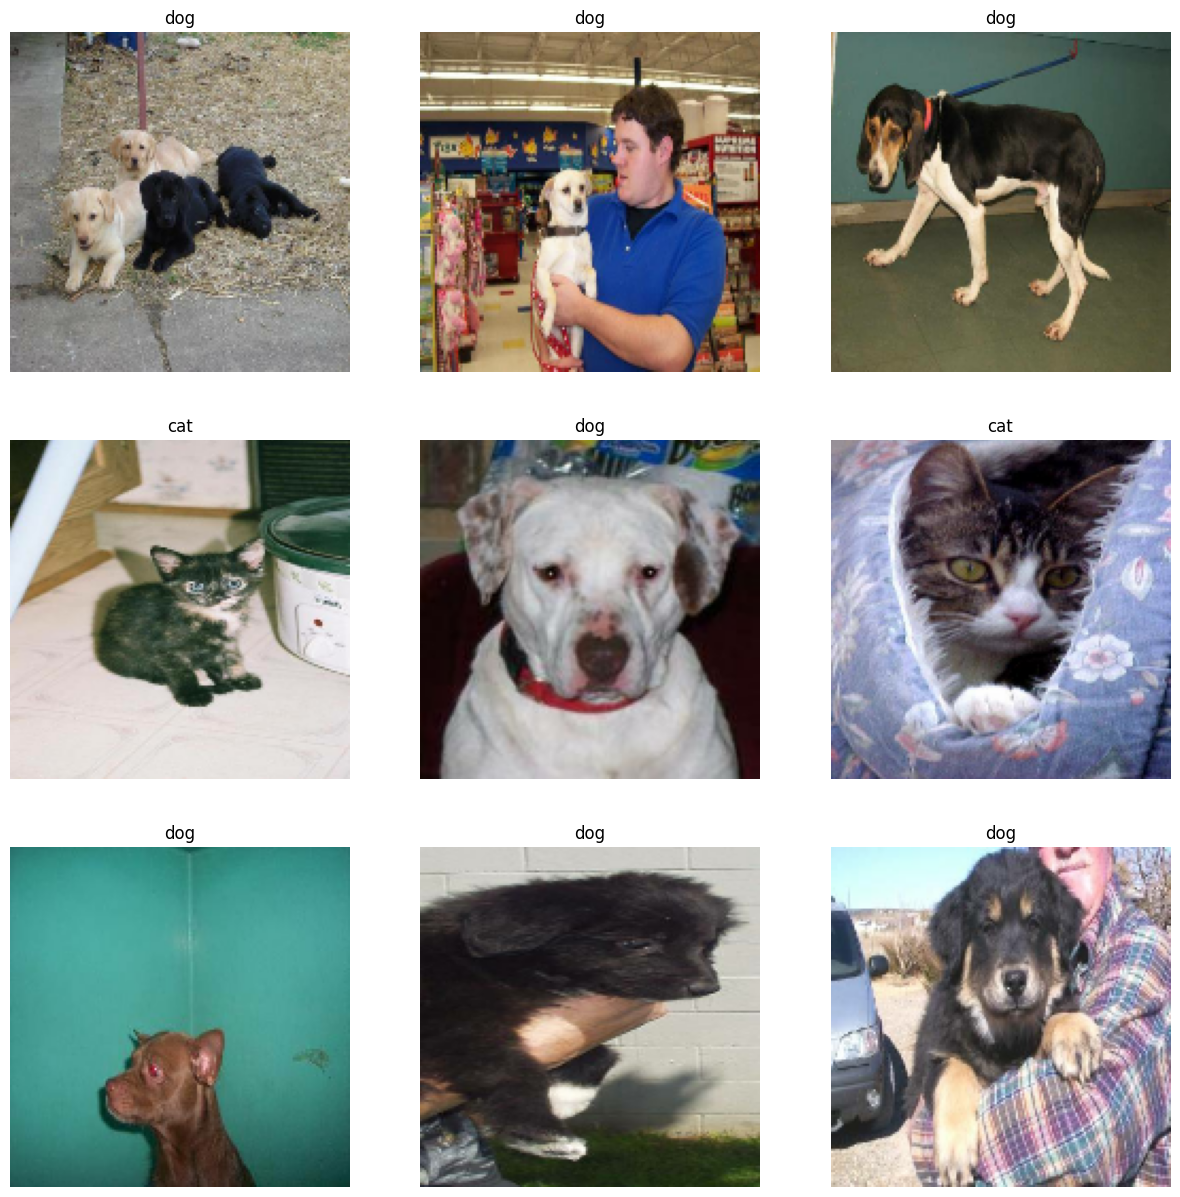

In [16]:
plot_dataset(dataset_validation)


<Figure size 640x480 with 0 Axes>

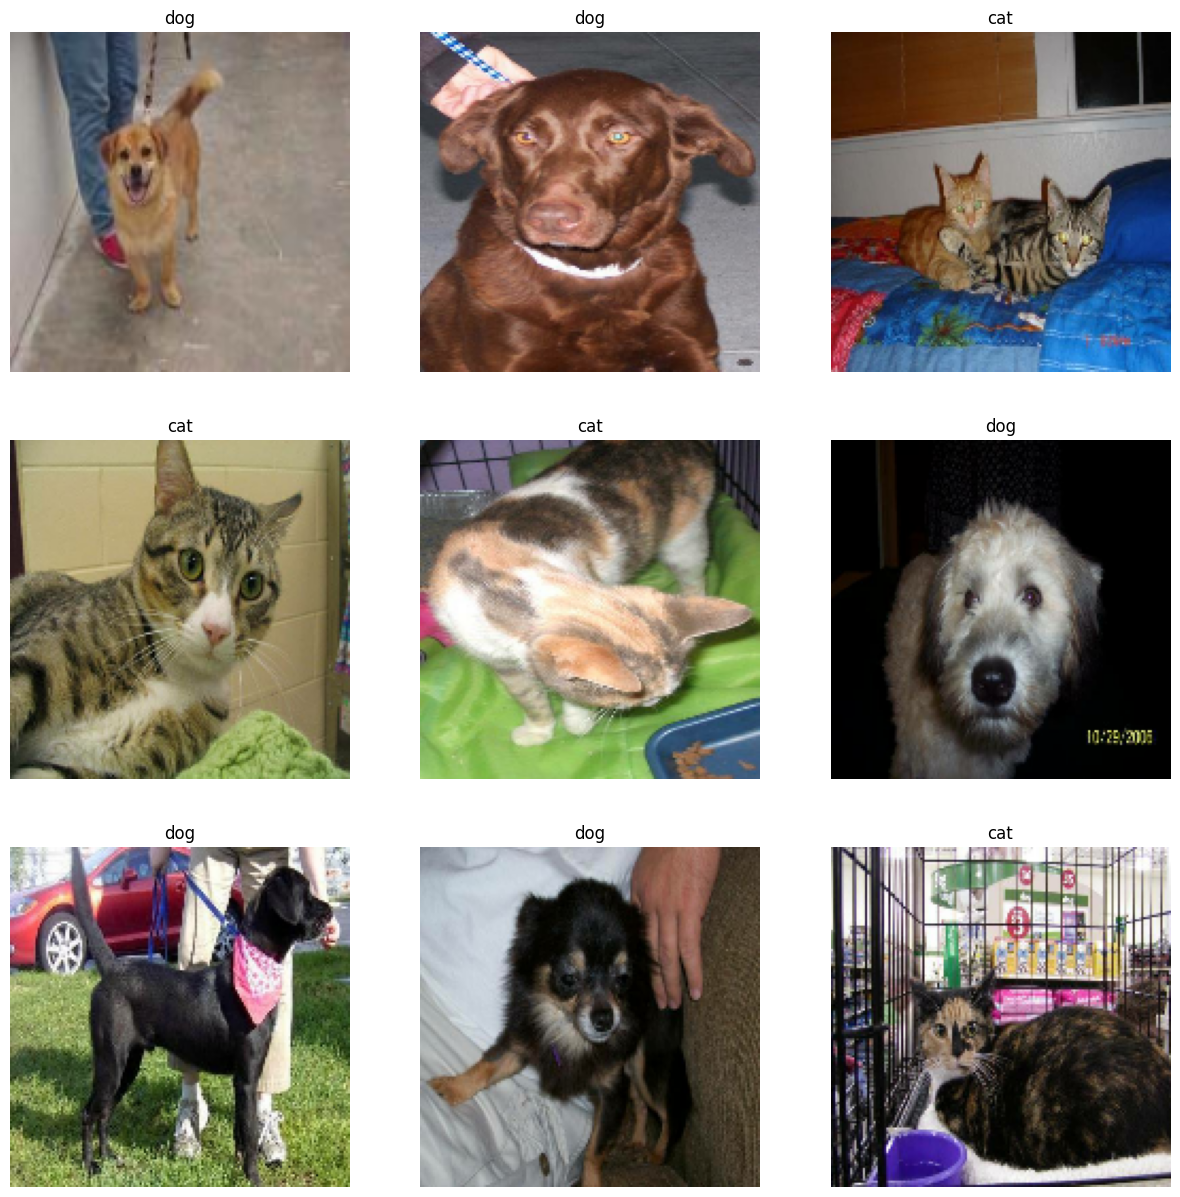

In [17]:
plot_dataset(dataset_test)


In [ ]:
#Criação do modelo de rede neural

#Modelo do tipo sequencial, uma camada seja aplicada após a outra em sequência
#Primeira camada que é responsável por fazer o rescaling das imagens para o formato 160x3
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling( #normaliza pixels (0 a 1)
        1. / image_color_channel_size,
        input_shape = image_shape
    ),
    #Passo a kernel 16 vezes e o tamanho da kernel é 3.
    #Relu: zera qualquer valor negativo e permanece com valor positivo
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    #Consolida o activation
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    #classificador final
    tf.keras.layers.Flatten(),
    #Camada com 128 nós onde os valores vão ser atualizados durante o treinamento
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')# sigmoid: saída binária (0 = gato, 1 = cachorro)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

In [24]:
#Treina o modelo com os dados de treino e valida com os dados de validação

history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 932ms/step - accuracy: 0.5052 - loss: 0.6976 - val_accuracy: 0.5074 - val_loss: 0.6847
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 912ms/step - accuracy: 0.5842 - loss: 0.6774 - val_accuracy: 0.6597 - val_loss: 0.6503
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 940ms/step - accuracy: 0.6545 - loss: 0.6382 - val_accuracy: 0.6597 - val_loss: 0.6135
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 907ms/step - accuracy: 0.6928 - loss: 0.5959 - val_accuracy: 0.6361 - val_loss: 0.6441
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7008 - loss: 0.5733 - val_accuracy: 0.6881 - val_loss: 0.5859
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7550 - loss: 0.5287 - val_accuracy: 0.7265 - val_loss: 0.5687
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7750 - loss: 0.4992 - val_accuracy: 0.7191 - val_loss: 0.5506
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 913ms/step - accuracy: 0.7621 - loss: 0.4907 - val_accuracy: 0.6

In [58]:
model.save('model.keras')

In [62]:
model = tf.keras.models.load_model('model.keras')

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def predict(image_file):
    # Carregar e preparar a imagem
    image = tf.keras.preprocessing.image.load_img(image_file, target_size=image_size)
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_batch = tf.expand_dims(image_array, 0)

    # Fazer a predição
    prediction = model.predict(image_batch)[0][0]
    label = 'cat' if prediction < 0.5 else 'dog'

    # Mostrar imagem e resultado
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Prediction: {label} ({prediction:.2f})')
    plt.show()


In [64]:
def predict_url(image_fname, image_origin):

    image_file = tf.keras.utils.get_file(image_fname, origin = image_origin)
    return predict(image_file)

In [65]:
from google.colab import files
uploaded = files.upload()

Saving bolinha1.jpg to bolinha1 (3).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


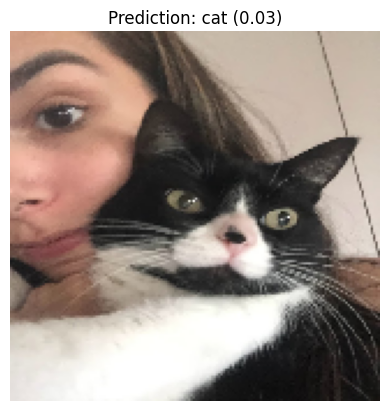

In [66]:
predict('bolinha1.jpg')


In [54]:
from google.colab import files
uploaded = files.upload()

Saving cachorrocaramelo.jpg to cachorrocaramelo.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


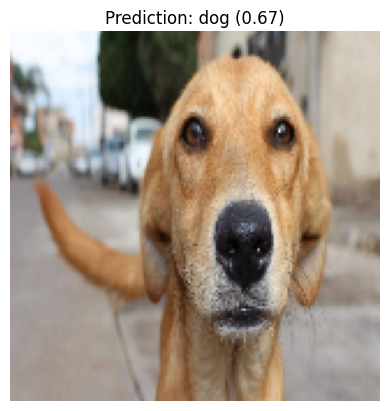

In [56]:
predict('cachorrocaramelo.jpg')
